In [15]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [2]:
zb_tweets = pd.read_csv('new_BoniekZibi_tweets.csv')

In [12]:
zb_tweets.head(10)

,id,created_at,text
0,1281106991277096960,2020-07-09 06:04:43,"Niestety COVID, a będzie tego dużo, dużo więcej. Trudne czasy😥😭 https://t.co/zctan0AvSd"
1,1280985910130204688,2020-07-08 22:03:35,"Potwierdzam. Widziałem, kibicowałem i .....Najlepszego1️⃣0️⃣0️⃣🍾👍🏻 https://t.co/wGXe4tdmkr"
2,1280975729665159170,2020-07-08 21:23:07,RT @LaczyNasPilka: Tomasz Kędziora zdobywcą PUCHARU UKRAINY! 🏆\r\n\r\nGratulacje! 👏👏👏 https://t.co/WLPXG2OkBJ
3,1280966912982355968,2020-07-08 20:48:05,"Co za emocje, ktoś musiał odpaść. Finał🏆🇵🇱 Cracovia-Lechia. Gratulacje dla Obrońców Tytułu 👏🏻👏🏻 @PZPNPuchar"
4,1280924535894745091,2020-07-08 17:59:42,"RT @LaczyNasPilka: G-E-N-I-A-L-N-Y sezon Roberta Lewandowskiego! 😍\r\n\r\nKorona króla strzelców, pobite rekordy, mistrzostwo i puchar Niemiec, a…"
5,1280921821517357061,2020-07-08 17:48:55,Lech czy Lechia ?
6,1280904538720010240,2020-07-08 16:40:14,A wiadomo co za element to zrobił? https://t.co/lNerURmsVW
7,1280774816216293381,2020-07-08 08:04:46,https://t.co/UDxPvdJXY3
8,1280773397593624576,2020-07-08 07:59:08,Chi è sto Rangnick? https://t.co/KvTkcCScGU
9,1280771514795687937,2020-07-08 07:51:39,RT @pzpn_pl: Kto najbardziej zaskoczył w miniony weekend w @_1liga_?\r\n\r\nZobacz wszystkie gole i skróty meczów 30. kolejki Fortuna 1. Ligi 👉 h…


In [4]:
zb_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          3231 non-null   int64 
 1   created_at  3231 non-null   object
 2   text        3231 non-null   object
dtypes: int64(1), object(2)
memory usage: 75.9+ KB


In [5]:
zb_tweets['created_at'] = pd.to_datetime(zb_tweets['created_at'])

In [6]:
zb_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          3231 non-null   int64         
 1   created_at  3231 non-null   datetime64[ns]
 2   text        3231 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 75.9+ KB


In [7]:
print("Początek: ", zb_tweets['created_at'].min())
print("Koniec: ", zb_tweets['created_at'].max())

Początek:  2019-04-12 16:36:03
Koniec:  2020-07-09 06:04:43


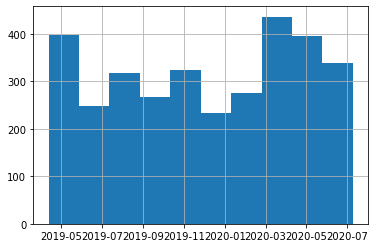

In [8]:
zb_tweets['created_at'].hist()

In [14]:
#szukamy tweetów, które są intencjonalnie publiczne (nie ma takich)
for tweet in zb_tweets['text']:
    if tweet[:2] == '.@':
        print(tweet)

In [18]:
#funkcja, która ilość wyrazów w danym tweecie
def word_count(str):
    return len(str.split())

#funkcja, która zlicza ilość różnych wyrazów w danym tweecie
def dif_word_count(str):
    counts = dict()
    words = str.split()
    
    for word in words:
        if word in count:
            count[word] +=1
        else:
            count[word] = 1
    return counts

#funkcja zliczająca tweety
def tweet_counts(tweet_array, threshold = 10):
    unique, counts = np.unique(np.array(tweet_array), return_counts=True)
    count_dict = dict(zip(unique,counts))
    
    return [(k,v) for k,v in count_dict.items() if v > threshold]

In [20]:
#tweety pisane do konkretnych ludzi
who_zibi_replies_to = []
for tweet in zb_tweets['text']:
    if tweet[:1] == '@':
        #wzmianka
        tweet_splited = tweet.split()
        for i in range (0,len(tweet_splited)):
            if tweet_splited[i][0] == '@':
                who_zibi_replies_to.append(tweet_splited[i])
        

In [23]:
#sprawdźmy do kogo Boniek odpisywał częściej niż 5 razy
zibi_reply_counts = tweet_counts(who_zibi_replies_to, 5)
zibi_reply_counts

[('@AdamGodlewski', 11),
 ('@BL_1916', 44),
 ('@BorekMati', 47),
 ('@CeltDawid', 13),
 ('@CommonSensePL', 6),
 ('@DawidOlejnicza5', 6),
 ('@GrosickiKamil', 6),
 ('@GrzegKrychowiak', 6),
 ('@Iwanczyk_P', 7),
 ('@JOlkiewicz', 12),
 ('@JakubRzezniczak', 10),
 ('@JaroslawBinczyk', 9),
 ('@K_Stanowski', 129),
 ('@Kacpo24', 7),
 ('@KoltonRoman', 40),
 ('@LaczyNasPilka', 13),
 ('@LordKoks', 6),
 ('@LukaszOlkowicz', 15),
 ('@MKSCracoviaSSA', 8),
 ('@M_Wawrzynowski', 13),
 ('@Maciej_Sawicki', 11),
 ('@MiBiBialonski', 14),
 ('@MichalS1978', 7),
 ('@NiemiecRyszard', 6),
 ('@PiotrWolosik', 30),
 ('@Polsport', 26),
 ('@PrawdaFutbolu', 17),
 ('@Pyra_KKS', 6),
 ('@RTS_Widzew_Lodz', 10),
 ('@RafalStec', 16),
 ('@RobertoRenga', 8),
 ('@SebastianMila11', 6),
 ('@SzJadczak', 23),
 ('@TSmokowski', 31),
 ('@TwaroTwaro', 7),
 ('@W_Kowal', 13),
 ('@WeszloCom', 13),
 ('@Wieslaw_Wilczyn', 7),
 ('@ZelekZyzynski', 10),
 ('@_Ekstraklasa_', 13),
 ('@cwiakala', 14),
 ('@czesmich', 18),
 ('@fkapica', 6),
 ('@garnekm

In [24]:
#wrzućmy to do DataFrame porządkując od największej do najmniejszej ilości wzmianek
zibi_replies_df = pd.DataFrame(zibi_reply_counts, columns=['who', 'count']).sort_values('count', ascending = False)
zibi_replies_df

,who,count
12,@K_Stanowski,129
2,@BorekMati,47
1,@BL_1916,44
14,@KoltonRoman,40
52,@mogiel90,34
...,...,...
44,@grajmy_razem,6
42,@fkapica,6
4,@CommonSensePL,6
31,@SebastianMila11,6


In [26]:
#oryginalne tweety (bez wzmianek innych użytkowników)
for tweet in zb_tweets['text']:
    if tweet[:1] != '@':
        print(tweet)

Niestety COVID, a będzie tego dużo, dużo więcej. Trudne czasy😥😭 https://t.co/zctan0AvSd
Potwierdzam. Widziałem, kibicowałem i .....Najlepszego1️⃣0️⃣0️⃣🍾👍🏻 https://t.co/wGXe4tdmkr
RT @LaczyNasPilka: Tomasz Kędziora zdobywcą PUCHARU UKRAINY! 🏆

Gratulacje! 👏👏👏 https://t.co/WLPXG2OkBJ
Co za emocje, ktoś musiał odpaść. Finał🏆🇵🇱 Cracovia-Lechia. Gratulacje dla Obrońców Tytułu 👏🏻👏🏻 @PZPNPuchar
RT @LaczyNasPilka: G-E-N-I-A-L-N-Y sezon Roberta Lewandowskiego! 😍

Korona króla strzelców, pobite rekordy, mistrzostwo i puchar Niemiec, a…
Lech czy Lechia ?
A wiadomo co za element to zrobił? https://t.co/lNerURmsVW
https://t.co/UDxPvdJXY3
Chi è sto Rangnick? https://t.co/KvTkcCScGU
RT @pzpn_pl: Kto najbardziej zaskoczył w miniony weekend w @_1liga_?

Zobacz wszystkie gole i skróty meczów 30. kolejki Fortuna 1. Ligi 👉 h…
RT @FIFAcom: 🗣️ “My mother was in the stands. They told her I'd scored the first goal – she couldn’t understand it. When they told her I’d…
W Polsce mieć swoje zdanie nie przystoi, l

https://t.co/KhVSYM…
Dziękuje i mała rada - piłka uczy pokory, proszę o tym pamiętać, uklony👍🏻 https://t.co/hPMJPRlL5k
To nieprawda, wyniki testów legijnych właśnie przyszły, wszystko ok, także oni mogą trenować..... ⚽️⚽️👍🏻👍🏻 https://t.co/juGroia6q0
Tylko dlatego, ze Ciebie lubię, a pożartować zawsze dobrze👍🏻👍🏻👊🏻 https://t.co/yuYxsnhfpE
Hej @MarcinNajman co sądzisz ? Dałbyś radę ? 😜😜 https://t.co/jycOyvRJWg
Ucinając spekulacje, gdyby wszystko było ok to kluby mogłyby , zgodnie z rozporządzeniem, trenować. Chuchając na zi… https://t.co/vEVW0mygGV
A Oni się tylko kłócić umieją....👎🏻👎🏻
Trovato oggi, che bella foto. Grande Gaetano, Grande Libero❤️❤️ https://t.co/99wZ9MP8Mh
Bartek-jesteś wspaniały ♥️♥️♥️ https://t.co/W6A7lv3Xy5
A tych skąd wzięli 😜😜👏🏻👏🏻 https://t.co/PLSzAgBxkV
RT @LaczyNasPilka: A kto to pojawił się na boisku ZWARu? 😎

Wojciech Szczęsny trenował indywidualnie z Andrzejem Woźniakiem, a my sprawdzil…
Wszystko ok, zaskoczyło mnie tylko ze tak łatwo do bramki trafił👍🏻👍🏻#naszGro

RT @Dorota_Liszka: Rusza XX edycja Turnieju „Z Podwórka na Stadion o Puchar Tymbarku”. Zapisy zespołów w kategoriach wiekowych U-8, U-10 or…
I najlepsze jest to, ze my tego meczu nie przegramy⚽️🇵🇱👍🏻😜 https://t.co/4dsG3pl2Ei
Tak jest🇵🇱⚽️👍🏻 https://t.co/1F9rg0CsIJ
Nowa przygoda na całe życie⚽️🇵🇱👍🏻 https://t.co/E4XI5Dr9mT
È stato miglior Capitano che io abbia mai avuto. https://t.co/rBhpwi8IXt
Buonanotte 👍🏻🎾👏🏻 https://t.co/TQu6woKsgr
Jeszcze muszę się duzo uczyć. Brawo Prezes😜😜 https://t.co/LGdVaWLroD
Powodzenia👍🏻 https://t.co/ssgCvrosRj
Plesnierowicz w AS Roma?  Co za newsy od rana, nie za wcześnie?
Rebic w AC Milan. Dobry jest?
Brawo👍🏻👍🏻😜 https://t.co/t93ZrWLAnQ
Brawo Dziewczyny, idziemy spokojnie do przodu. https://t.co/G6xUgBLXqZ
Ach ci żużlowcy. Wielki wieczór Janowskiego i Zmarzlika. 🇵🇱🏍👏🏻👏🏻 @BartekZmarzlik
Spokojnie, tutaj nie gra się by wygrać mecz, stawka jest dużo większa. Na razie 👏🏻👏🏻👏🏻 https://t.co/CRlQnYNsGc
RT @pzpn_pl: W trakcie ceremonii losowania grup @EuropaLeague przed

In [28]:
#tylko retweety
who_zibi_retweets = []
for tweet in zb_tweets['text']:
    if tweet[:2] == 'RT':
        #retweet
        splited = tweet.split(': ')
        rt, who = splited[0].split(' ')
        who_zibi_retweets.append(who)  

In [29]:
#sprawdźmy kogo Boniek retweetował najczęściej
zibi_retweet_counts = tweet_counts(who_zibi_retweets, 5)
zibi_retweet_counts

[('@AmpFutbolPolska', 8),
 ('@FIFAcom', 6),
 ('@LaczyNasPilka', 195),
 ('@Maciej_Sawicki', 8),
 ('@MiBiBialonski', 7),
 ('@PZPNGrassroots', 23),
 ('@PZPNPuchar', 10),
 ('@PilkaNozna_pl', 6),
 ('@RTS_Widzew_Lodz', 6),
 ('@a_delimat', 6),
 ('@adriandudacom', 8),
 ('@laczynaskobieca', 49),
 ('@mzachodny', 8),
 ('@pzpn_pl', 45),
 ('@sport_tvppl', 9)]

In [30]:
#wrzućmy to do DataFrame porządkując od największej do najmniejszej ilości retweetów
zibi_retweet_df = pd.DataFrame(zibi_retweet_counts, columns=['who', 'count']).sort_values('count', ascending = False)
zibi_retweet_df

,who,count
2,@LaczyNasPilka,195
11,@laczynaskobieca,49
13,@pzpn_pl,45
5,@PZPNGrassroots,23
6,@PZPNPuchar,10
14,@sport_tvppl,9
0,@AmpFutbolPolska,8
3,@Maciej_Sawicki,8
10,@adriandudacom,8
12,@mzachodny,8
